### Importation des librairies

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Initalisation du répertoire de travail
Exécuter la cellule et connecter vous à votre compte Google pour commencer
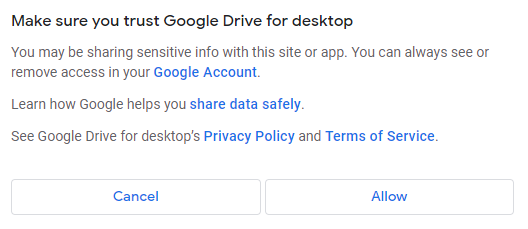

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Début du TP

Pour notre TP, nous allons étudier différentes espèces de poissons

| Espèce | Image | poids en g | longueur verticale en cm | longueur diagonale en cm | longueur transversale en cm | hauteur en cm | largeur diagonale en cm |
| :----- | :---: | ----: | -----------------------: | -----------------------: | -----------------------: | -----------------------: | -----------------------: |
| Bream | 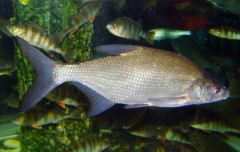| 617 | 30 | 33 | 38 | 15 | 5 |
| Roach | 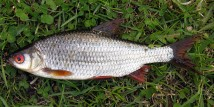 | 152 | 21 | 22 | 25 | 7 | 4 |
| Whitefish| 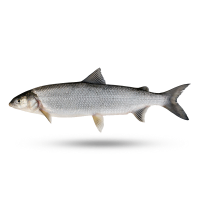 | 531 | 29 | 31 | 34 | 10 | 5 |
| Parkki|| 154 | 19 | 20 | 23 | 9 | 3 |
| Perch|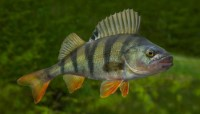| 395 | 26 | 28 | 30 | 8 | 5 |
| Pike|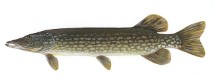| 718 | 42 | 45 | 49 | 8 | 5 |
| Smelt|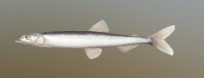| 8,5 | 11 | 12 | 13 | 2 | 1 |

Tout d'abord on doit télécharger notre dataset, et le charger dans une variable pour la manipuler.

In [3]:
!git clone https://github.com/Bubuclem/introduction_to_ml.git

Cloning into 'introduction_to_ml'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [4]:
data=pd.read_csv('/content/introduction_to_ml/Fish.csv')

# Analyse des données

Maintenant nous pouvons regarder nos données.

In [5]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Pour ce TP nous cherche à entrainer un modèle à détecter une espèce grâce à des dimensions données

Premièrement on peut regarder s'il existe des corrélations entre les différentes valeurs de notre datas et.

On place nos données dans une matrice pour y réaliser des traitements par la suite.

*(On arrondit les données à deux chiffres après la virgule pour y voir plus clair)*

In [6]:
# Comment mettre nos données dans une matrice, pour afficher les corrélations avec un arrondi de 2 chiffres ?
matrice=data.corr().round(2)

On utilise ensuite Seaborn pour voir les corrélations.

*(On peut utiliser matplotlib.pyplot pour redimensionner l'affichage)*

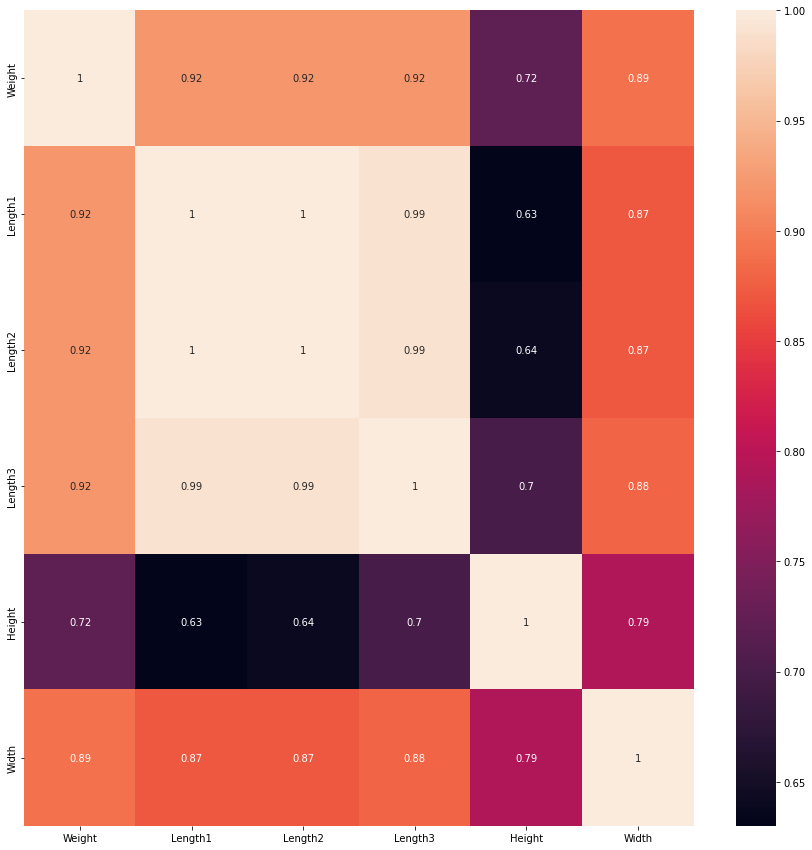

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
# Trouver un moyen d'afficher les corrélations, en complétant la ligne suivante
sns.heatmap(data=matrice, annot=True); 

On voit alors une donnée intéressante, deux valeurs montrent une corrélation.

Pour vérifier nous allons utiliser pairplot pour afficher les points par rapport à nos deux caractéristiques.

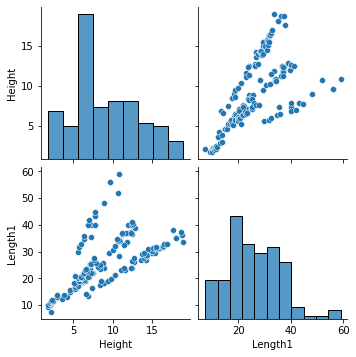

In [8]:
# Comment utiliser pairplot, en complétant la ligne suivante
sns.pairplot(data=data[["Height","Length1"]]);

Nous distinguons alors plusieurs familles dans nos données. 

Nous allons donc les exploiter pour que notre modèle apprenne à classifier des espèces de poissons.

# Création de notre modele d'entrainement

Nous mettons nos données dans des axes pour les entrainements.

On retire les espèces de nos colonnes.

In [9]:
X = data.drop(['Species'], axis = 'columns')
Y = data.Species

In [10]:
# Comment utiliser train_test_split, en complétant la ligne suivante ? 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Nous allons utiliser un algorithme de classification, **Machine à vecteurs de support**

In [11]:
model = SVC(kernel = 'linear', C = 1)

On entraine notre modèle

In [12]:
model.fit(X_train, y_train) 
svm_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

Une fois entrainer, on affiche dans un graphique si le notre modèle fait des erreurs.

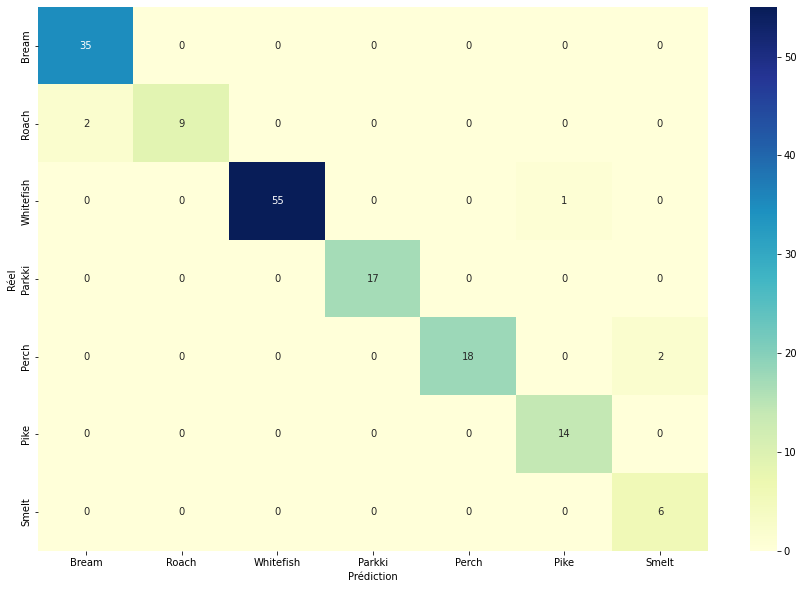

In [15]:
labels = ['Bream','Roach','Whitefish','Parkki','Perch','Pike','Smelt']

prediction = model.predict(X)
cm=confusion_matrix(Y,prediction)
conf_matrix=pd.DataFrame(data=cm, columns=labels,index=labels)
plt.figure(figsize = (15,10))

# Quel graphique choisir pour représenter la matrice de confusion ?
ax = sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
ax.set(xlabel='Prédiction', ylabel='Réel');

# Prédictions

Maintenant que notre modèle fonctionne bien, nous pouvons faire des prédictions.

| Species | Weight | Length1 | Length2 | Length3 | Height | Width |
| :------ | :----- | :------ | :------ | :------ | :----- | :-----|
|species name of fish|weight of fish in Gram g|vertical length in cm|diagonal length in cm|cross length in cm|height in cm|diagonal width in cm|
|Bream|617|30|33|38|15|5|
| Roach | 152 | 21 | 22 | 25 | 7 | 4|
| Whitefish | 531 | 29 | 31 | 34 | 10 | 5|
| Parkki | 154 | 19 | 20 | 23 | 9 | 3|
| Perch | 395 | 26 | 28 | 30 | 8 | 5|
| Pike | 718 | 42 | 45 | 49 | 8 | 5|
| Smelt | 8,5 | 11 | 12 | 13 | 2 | 1|

In [17]:
# Comment réaliser une prédiction ?
print(model.predict([[730,50,50,50,10,5]]))

['Pike']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
